In [57]:
import pandas as pd
import yfinance as yf
import math
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = yf.download('GOOGL', start='2020-01-01', end='2024-01-01')
df.columns = df.columns.droplevel(1)  # Remove the 'GOOGL' level
df.columns = df.columns.str.lower()   # Convert to lowercase
df['hct_pct'] = (df['high'] - df['close']) / df['close'] * 100
df['pct_change'] = (df['close'] - df['open']) / df['open'] * 100
df[['close', 'hct_pct', 'pct_change', 'volume']]

forecast_col = 'close'
df.fillna(-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)
df.dropna(inplace=True)

X = np.array(df.drop(['label'], axis=1))
y = np.array(df['label'])
X = preprocessing.scale(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)
clf = LinearRegression()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

C:\Users\Henry Kwakye\AppData\Local\Temp\ipykernel_3868\3461368457.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('GOOGL', start='2020-01-01', end='2024-01-01')
[*********************100%***********************]  1 of 1 completed

0.9334889898975736


C:\Users\Henry Kwakye\AppData\Local\Temp\ipykernel_3868\1340170132.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('GOOGL', start='2020-01-01', end='2024-01-01')
[*********************100%***********************]  1 of 1 completed


Forecast: [133.8554439  131.06626857 131.03888703 128.35930376 129.96079497
 129.42190977 137.10609144 134.87079235 132.22961415 131.93129223
 131.54403319]
Accuracy: 0.9334889898975736
Forecasting 11 days
Price       close  high  low  open  volume  hct_pct  pct_change  label  \
Date                                                                     
2023-12-20    NaN   NaN  NaN   NaN     NaN      NaN         NaN    NaN   
2023-12-21    NaN   NaN  NaN   NaN     NaN      NaN         NaN    NaN   
2023-12-22    NaN   NaN  NaN   NaN     NaN      NaN         NaN    NaN   
2023-12-23    NaN   NaN  NaN   NaN     NaN      NaN         NaN    NaN   
2023-12-24    NaN   NaN  NaN   NaN     NaN      NaN         NaN    NaN   

Price         Forecast  
Date                    
2023-12-20  137.106091  
2023-12-21  134.870792  
2023-12-22  132.229614  
2023-12-23  131.931292  
2023-12-24  131.544033  


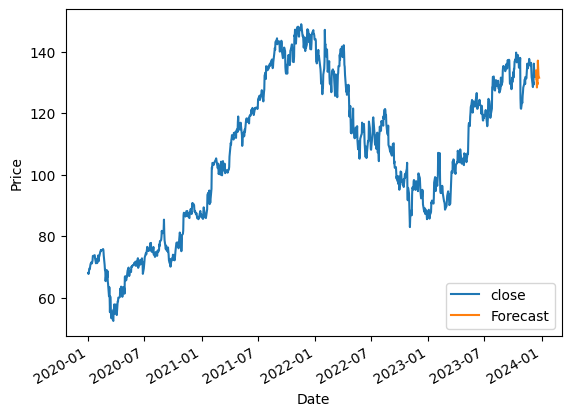

In [58]:
import math
import numpy as np
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import style
import pickle
import datetime

df = yf.download('GOOGL', start='2020-01-01', end='2024-01-01')
df.columns = df.columns.droplevel(1)  # Remove the 'GOOGL' level
df.columns = df.columns.str.lower()   # Convert to lowercase
df['hct_pct'] = (df['high'] - df['close']) / df['close'] * 100
df['pct_change'] = (df['close'] - df['open']) / df['open'] * 100
df[['close', 'hct_pct', 'pct_change', 'volume']]

forecast_col = 'close'
df.fillna(-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))  # 1% of the data
df['label'] = df[forecast_col].shift(-forecast_out)

X = np.array(df.drop(['label'], axis=1))
X = preprocessing.scale(X)
X = X[:-forecast_out]
X_lately = X[-forecast_out:]

df.dropna(inplace=True)
y = np.array(df['label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)
clf = LinearRegression(n_jobs=1)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)

forecast_set = clf.predict(X_lately)
print(f"Forecast: {forecast_set}")
print(f"Accuracy: {accuracy}")
print(f"Forecasting {forecast_out} days")
df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]

print(df.tail())


df['close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()



